**Task 3: Prediction using decision tree**

email: drishtijain.0120@gmail.com


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn import datasets

**Loading dataset**

In [ ]:
#iris = load_iris()
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target


**Understanding the dataset**

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
df.shape


(150, 4)

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isna()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


**Visualizing the data**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f2c5c5630>,
      dtype=object)

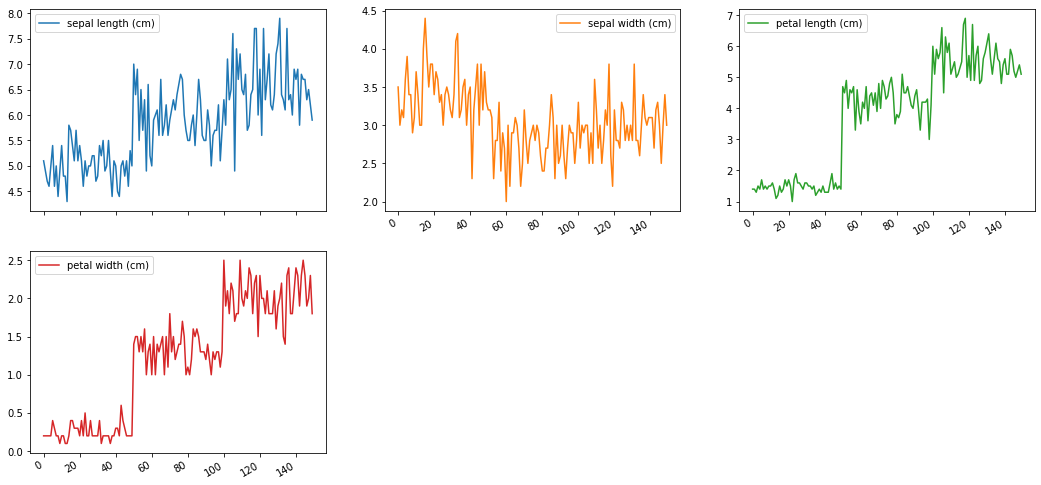

In [ ]:
df.plot(kind='line',subplots=True,layout=(3,3),figsize=(18,14))

**Splitting data into training and testing set**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3,random_state=0,stratify=y)

**Decision Tree Classifier for training dataset**

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
columns_list=list(df.columns.values)
columns_list

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

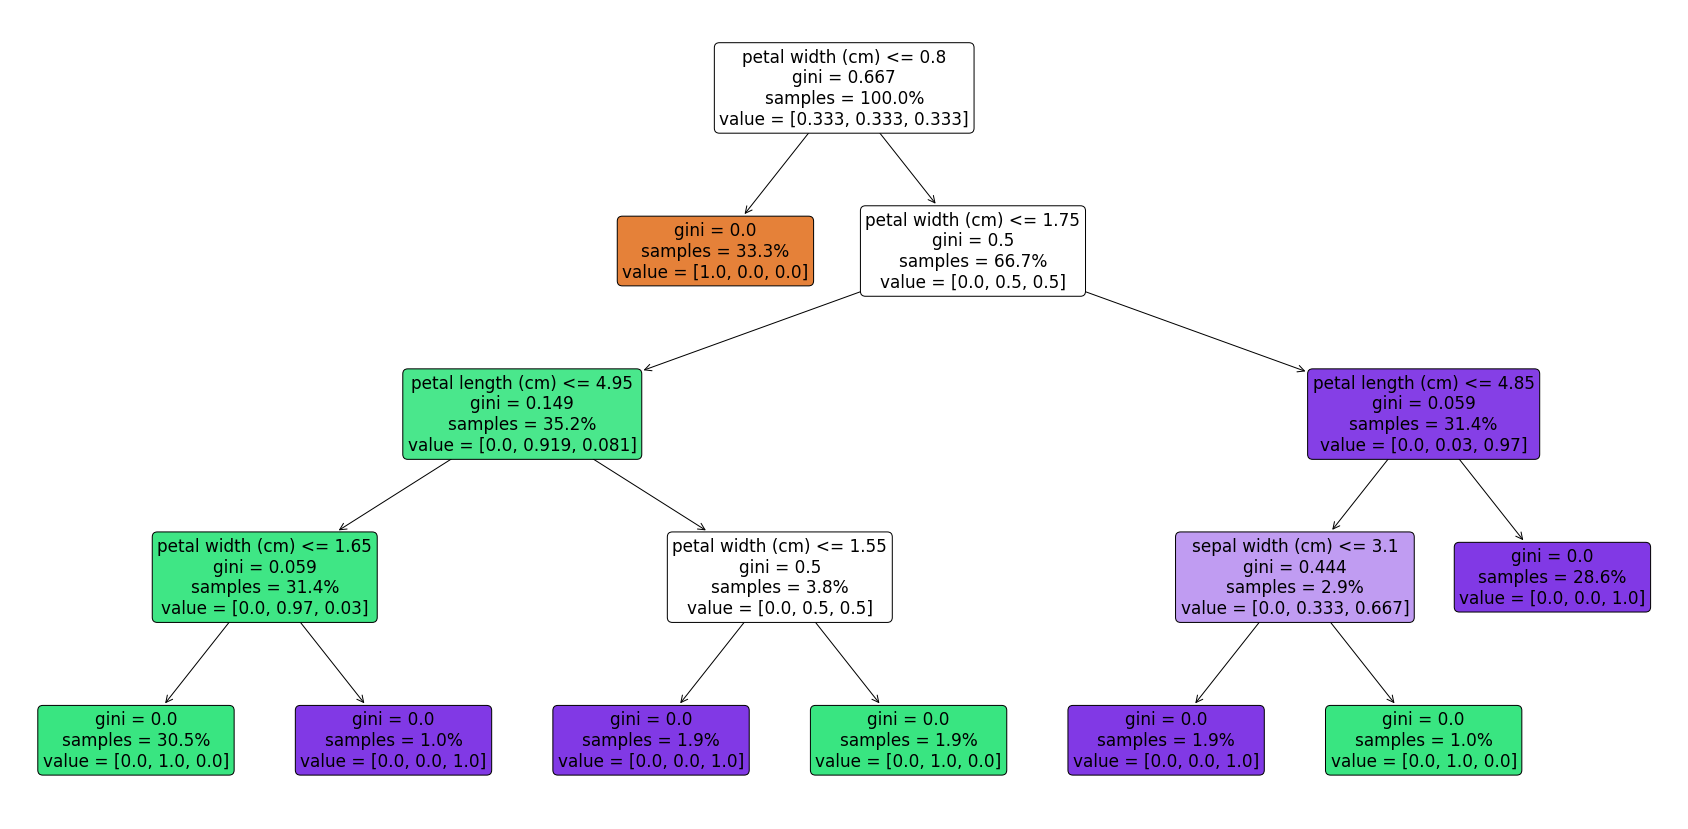

In [ ]:
plt.figure(figsize=(30,15))
tree.plot_tree(clf,feature_names=columns_list,
               filled=True,precision=3,proportion=True,rounded=True)
plt.show()

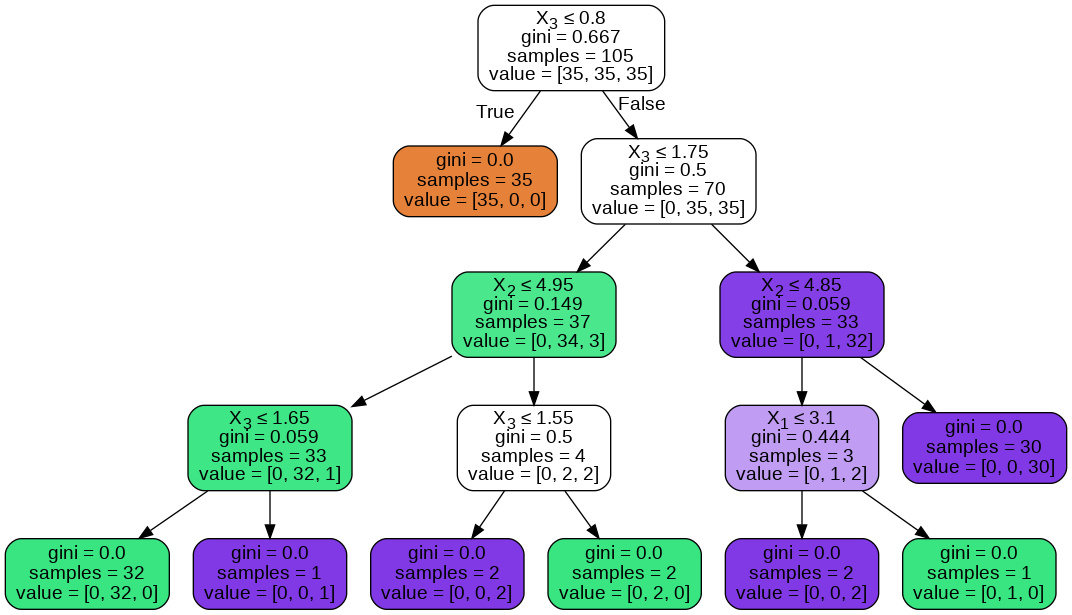

In [ ]:
import io
import pydotplus
from IPython.display import Image
from graphviz import Source
dot_data = io.StringIO()
tree.export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

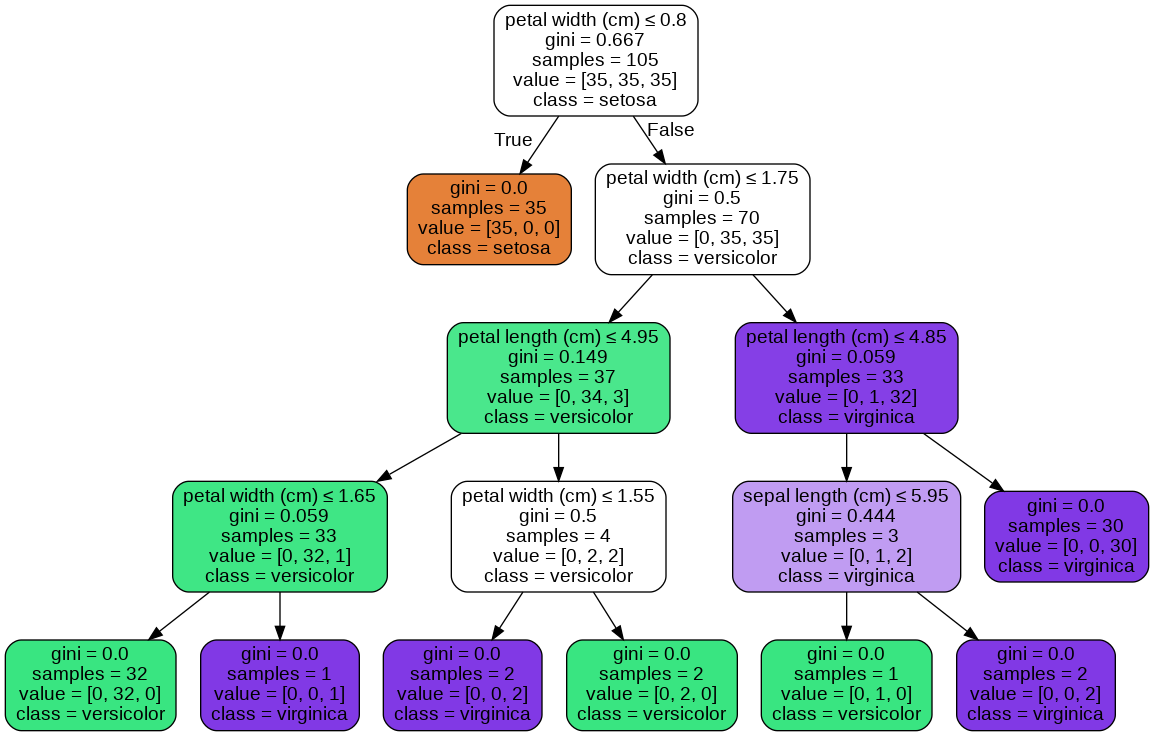

In [ ]:
dot_data = io.StringIO()
tree.export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = iris.feature_names, class_names = iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [ ]:
y_pred1=clf.predict(X_test)

In [ ]:
print('Accuracy for training dataset: ', clf.score(X_train,y_train))
print('Accuracy for testing dataset: ',clf.score(X_test,y_test))

Accuracy for training dataset:  1.0
Accuracy for testing dataset:  0.9777777777777777


In [ ]:
clf2=DecisionTreeClassifier(splitter='best',max_depth=4,max_leaf_nodes=6)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Prunning**

In [ ]:
clf2=DecisionTreeClassifier(splitter='best',max_depth=4,max_leaf_nodes=6)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Visualising training dataset with prunning**

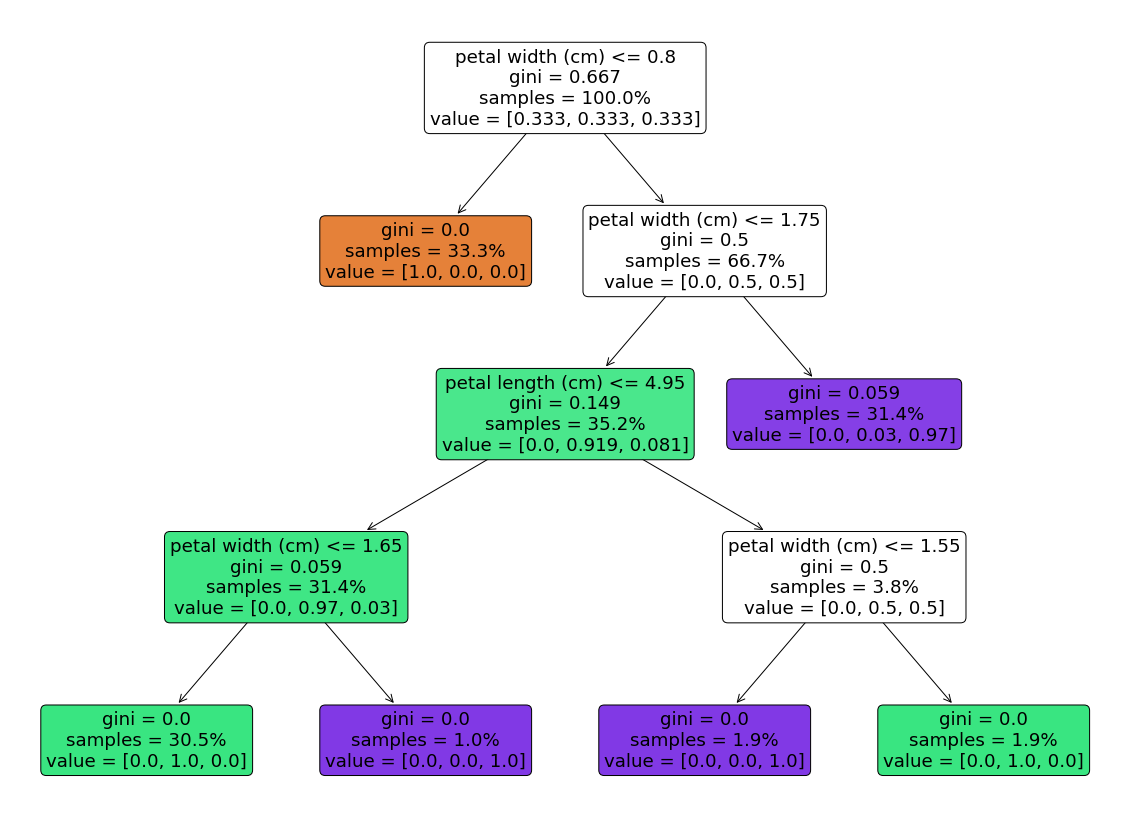

In [ ]:

plt.figure(figsize=(20,15))
tree.plot_tree(clf2,feature_names=columns_list,
               filled=True,precision=3,proportion=True,rounded=True)
plt.show()

In [ ]:
dtree_clf=DecisionTreeClassifier(splitter='best',max_depth=4,max_leaf_nodes=6)
dtree_clf.fit(df,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print('Accuracy for complete dataset: ', dtree_clf.score(df,y))

Accuracy for complete dataset:  0.9866666666666667


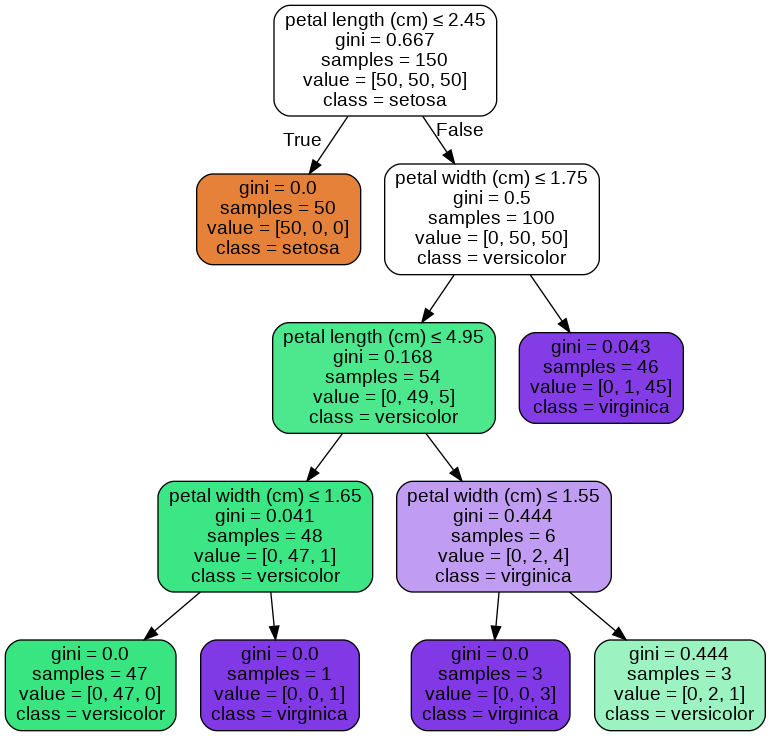

In [ ]:
dot_data = io.StringIO()
tree.export_graphviz(dtree_clf, out_file=dot_data, feature_names=columns_list,  
                filled=True, rounded=True,
                special_characters=True, class_names = iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())